In [1]:
import pandas as pd
import requests
import datetime as dt


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings 
pd.options.mode.chained_assignment = None # se desactiva advertencias de pandas por la edición_sobrescritura

In [20]:
# API 

url = "https://data.cityofnewyork.us/resource/7ym2-wayt.json"

# Parámetros de paginación
limit = 1000  # Número máximo de resultados por página
offset = 0    # Número de resultados a omitir antes de comenzar a obtener resultados
results = []  # Lista para almacenar los resultados

while True:
    # Construir la URL con los parámetros de paginación
    query_url = f'{url}?$limit={limit}&$offset={offset}'
    
    # Leer los datos de la URL en un DataFrame
    df = pd.read_json(query_url)
    
    # Agregar los resultados al DataFrame
    results.append(df)
    
    # Verificar si hay más resultados
    if len(df) < limit:
        break  # Si no hay más resultados, salir del ciclo
    
    offset += limit  # Incrementar el offset para la próxima página

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(results, ignore_index=True)

KeyboardInterrupt: 

url https://data.cityofnewyork.us/Transportation/Automated-Traffic-Volume-Counts/7ym2-wayt

In [ ]:
df_final=df
df

In [ ]:
# forma manual

df=pd.read_csv("../data_origen/Automated_Traffic_Volume_Counts.csv")

In [22]:
data=df

# Se renombra columnas

data = data.rename(columns={'Yr': 'year', 'M': 'month','D': 'day' })

# Se crea columna 'date'

data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Se toman las variables necesarias

data=data[['Boro','date','Vol']]

# Se renombra columnas

data.columns=['borough', 'date', 'Volumen_per_15min']

# se establece rango desde 2008 al 2020
data=data.loc[data['date'] > '2008-01-01']

data.head(5)

,borough,date,Volumen_per_15min
0,Queens,2015-06-23,9
1,Staten Island,2015-09-14,6
2,Bronx,2017-10-19,85
3,Brooklyn,2017-11-07,168
4,Manhattan,2017-11-03,355


In [ ]:
# Se Exporta el dataframe

densidad_vehicular=data
densidad_vehicular2.to_parquet('../Datasets/densidad_vehicular.parquet')

In [23]:
# Se modifica la columna 'Date' en formato año

data['date']=data['date'].dt.year
data.head(3)

,borough,date,Volumen_per_15min
0,Queens,2015,9
1,Staten Island,2015,6
2,Bronx,2017,85


In [24]:
# Se agrupa
data=data.groupby(['borough','date']).Volumen_per_15min.mean().reset_index()
data.head(3)

,borough,date,Volumen_per_15min
0,Bronx,2008,682.971460
1,Bronx,2009,59.482906
2,Bronx,2010,100.997868


In [27]:
data1=data[['borough','Volumen_per_15min']]

data1=data1.groupby(['borough']).Volumen_per_15min.mean().reset_index()

data1.head(3)

,borough,Volumen_per_15min
0,Bronx,145.424446
1,Brooklyn,93.328586
2,Manhattan,157.950717


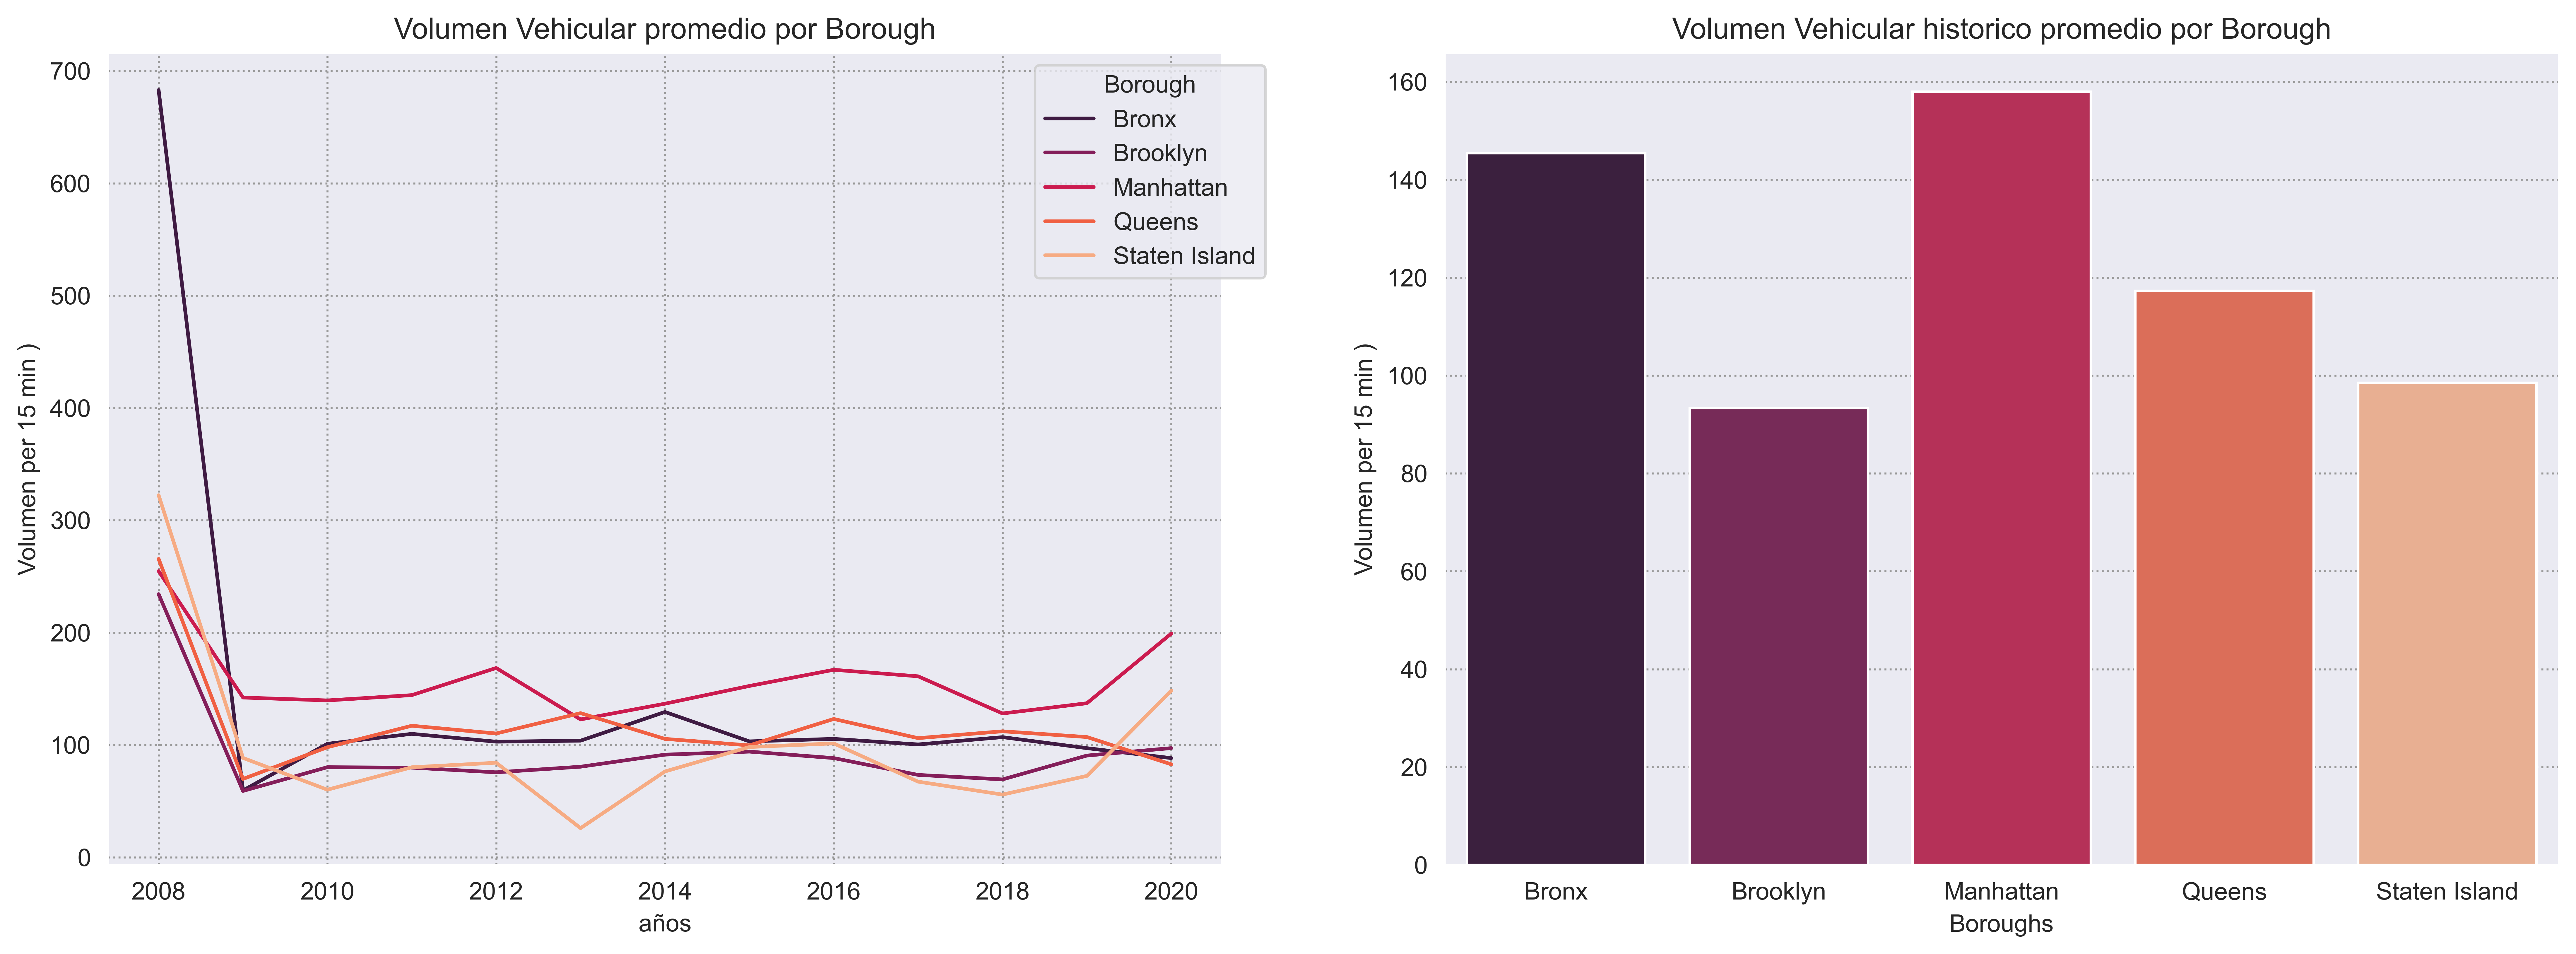

In [33]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})# Tema para de backgroung grafs

#Graficas

# Se crea Subplot de 1*2

fig, ax = plt.subplots(1, 2, figsize=(18, 6),dpi=600)

# Gráfico 1 Densidad de Trafico promedio por Borough

sns.lineplot(x="date", y="Volumen_per_15min", data=data,  hue='borough', ax=ax[0], markers=True, palette="rocket")

    # Etiquetas
ax[0].set_xlabel('años')
ax[0].set_ylabel('Volumen per 15 min )')
ax[0].set_title('Volumen Vehicular promedio por Borough')
    # Leyenda
ax[0].legend(title='Borough', loc='upper right', bbox_to_anchor=(1.05, 1)) 


# Gráfico 2 Densidad de Trafico promedio por Borough

sns.barplot(x="borough", y="Volumen_per_15min", data=data1,   ax=ax[1], palette="rocket")

    # Etiquetas
ax[1].set_xlabel('Boroughs')
ax[1].set_ylabel('Volumen per 15 min )')
ax[1].set_title('Volumen Vehicular historico promedio por Borough')

plt.show()